# Data Analysis and Visualizations

In this notebook, we explore our clean dataset and make some visualizations. 

For the plots we use matplotlib and seaborn. We also work with wordcloud.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import pickle

We load the data:

In [4]:
path='/home/maggie/News_classifier/2.Data_Cleaning_and_Text_Preparation/' 
data=pd.read_csv(path + 'clean_data.csv',encoding='utf8')
data.Fecha=data.Fecha.apply(pd.to_datetime)

In [5]:
data.shape

(26047, 9)

In [6]:
print('At the moment we have ' + str(data.shape[0]) + ' news articles.')

At the moment we have 26047 news articles.


A look at the first five rows of our data frame:

In [5]:
data.head()

Título  \
0  Vecinos de Cristina Kirchner colgaron una band...   
1  Tras un año de cortocircuitos, el Gobierno rea...   
2  El domingo Javier Milei tendrá su búnker en el...   
3  Elecciones 2021: se podrá viajar gratis todo e...   
4  El drama de la inseguridad en la Provincia: se...   

                                                Link  \
0  https://www.clarin.com/politica/vecinos-cristi...   
1  https://www.clarin.com/politica/ano-cortocircu...   
2  https://www.clarin.com/politica/domingo-javier...   
3  https://www.clarin.com/politica/elecciones-202...   
4  https://www.clarin.com/politica/drama-inseguri...   

                                         Descripcion               Fecha  \
0  La pusieron en el piso de arriba de donde vive... 2021-11-09 13:41:23   
1  Volvieron a mostrarse juntos en campaña. Inten... 2021-11-09 13:07:56   
2  El economista liberal de la Libertad Avanza es... 2021-11-09 12:33:57   
3  Lo confirmó el Ministerio de Transporte. En la... 2021-11-09 11:57:30   
4  Son números oficiales de 2020. Se iniciaron 78... 2021-11-09 11:57:13   

   Diario     Label                                              Texto  \
0  Clarín  Política  Vecinos de Cristina Kirchner colgaron una band...   
1  Clarín  Política  Tras un año de cortocircuitos, el Gobierno rea...   
2  Clarín  Política  El domingo Javier Milei tendrá su búnker en el...   
3  Clarín  Política  Elecciones 2021: se podrá viajar gratis todo e...   
4  Clarín  Política  El drama de la inseguridad en la Provincia: se...   

                                         Texto_clean  \
0  vecinos de cristina kirchner colgaron una band...   
1  tras un año de cortocircuitos el gobierno rean...   
2  el domingo javier milei tendrá su búnker en el...   
3  elecciones se podrá viajar gratis todo el domi...   
4  el drama de la inseguridad en la provincia se ...   

                Texto_clean_lemmatized_and_stopwords  
0  vecino cristina kirchner colgar bandera justic...  
1  año cortocircuito gobierno reanimar tándem mar...  
2  domingo javier milei búnker luna park traer fi...  
3  elección viajar gratis domingo gente votar con...  
4  drama inseguridad provincia abrir causa día av...

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26047 entries, 0 to 26046
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Título                                26047 non-null  object        
 1   Link                                  26047 non-null  object        
 2   Descripcion                           24175 non-null  object        
 3   Fecha                                 26047 non-null  datetime64[ns]
 4   Diario                                26047 non-null  object        
 5   Label                                 26047 non-null  object        
 6   Texto                                 26047 non-null  object        
 7   Texto_clean                           26047 non-null  object        
 8   Texto_clean_lemmatized_and_stopwords  26047 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 1.8+ MB


In [7]:
data.Descripcion = data.Descripcion.fillna('')

### Number of news articles in each category

In [8]:
data.Label.value_counts()

Deportes                  5137
Política                  5080
Economía                  4573
Internacional             3649
Cultura y Espectáculos    3207
Sociedad                  2827
Policiales                1025
Ciencia y tecnología       549
Name: Label, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Label'>

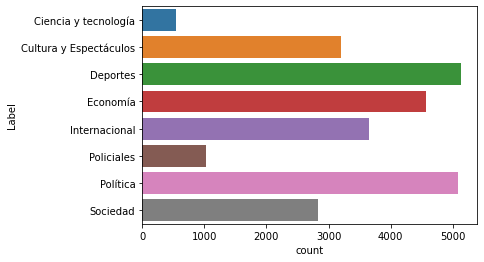

In [9]:
sns.countplot(y="Label", data=data, order=data.sort_values('Label').Label.unique())

"Deportes" is the category with the most articles,  closely followed by "Política". 
We observe that we have much less news articles in the categories "Ciencia y tecnología" and "Policiales". 

### Percentage of news articles in each category

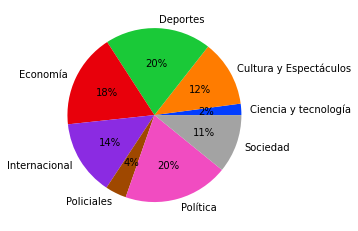

In [10]:
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:8]
labels = data.sort_values('Label').Label.unique()
#create pie chart
data_labels=data.sort_values('Label').Label
plt.pie(data_labels.value_counts(sort=False), labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Number of news articles in each newspaper

In [11]:
data.Diario.value_counts()

Ámbito Financiero    7511
Télam                4770
Clarín               4682
Página 12            3156
Diario AR            3151
Perfil               2777
Name: Diario, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Diario'>

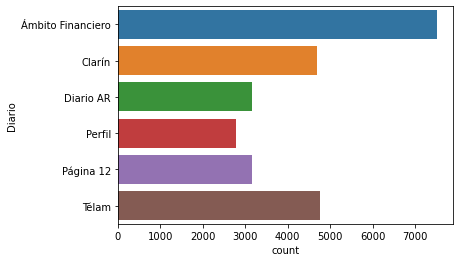

In [12]:
#Ámbito Financiero has accent mark
list_of_newspapers=['Ámbito Financiero'] + data.sort_values('Diario').Diario.unique().tolist()[0:5]
sns.countplot(y="Diario", data=data,order=list_of_newspapers)


Ámbito Financiero is the newspaper with the most articles, followed by Télam and Clarín.

### Number of news articles in each category by newspaper

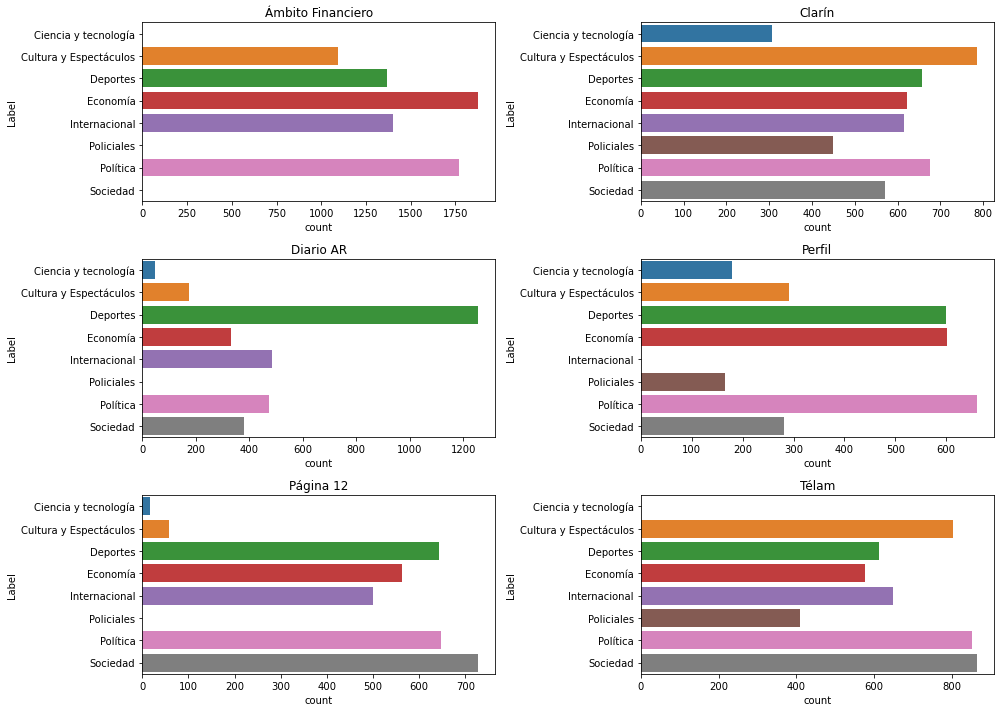

In [13]:
fig, axs = plt.subplots(nrows=3,ncols=2, figsize=(14,10))
for i in range(len(list_of_newspapers)):
    sns.countplot(y="Label", data=data[data.Diario==list_of_newspapers[i]],order=data.sort_values('Label').Label.unique(),ax=axs[i//2,i%2]).set_title(list_of_newspapers[i])
fig.tight_layout()

### News date

We count how many news articles we have for each month.

In [14]:
data['month']=data['Fecha'].apply(lambda x: x.month)
data['year']=data['Fecha'].apply(lambda x: x.year)
data['date'] = data['month'].map(str)+ '-' +data['year'].map(str)
data['date'] = pd.to_datetime(data['date'], format='%m-%Y').dt.strftime('%m-%Y')

In [15]:
data.date.value_counts()

02-2022    10209
11-2021     6036
03-2022     4228
12-2021     3510
01-2022     1815
10-2021      158
09-2021       68
08-2021       19
07-2021        4
Name: date, dtype: int64

We plot these values sorted by date.

<AxesSubplot:xlabel='count', ylabel='date'>

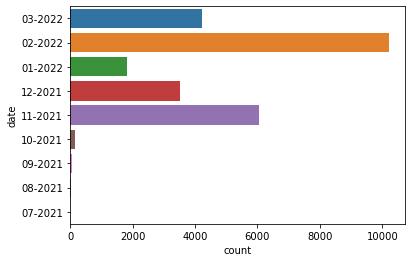

In [16]:
sns.countplot(y='date', data=data,order=data.sort_values('Fecha',ascending=False).date.unique())

### News title and description length 

We save the length of the title and descriptions, as well as the modified versions of the text.

In [17]:
list_of_text_columns=['Título','Descripcion','Texto','Texto_clean','Texto_clean_lemmatized_and_stopwords']
for item in list_of_text_columns:
    data[item + '_len']=data[item].apply(lambda x: len(str(x).split()))

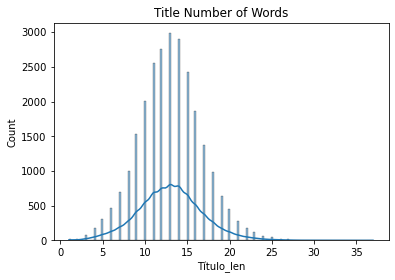

In [18]:
sns.histplot(data['Título_len'],kde=True)
plt.title('Title Number of Words')
plt.show()

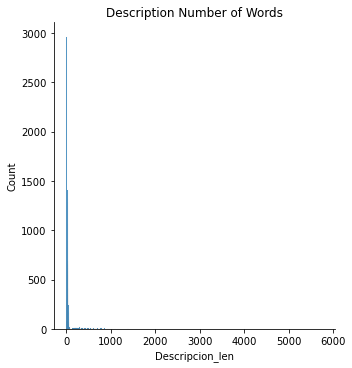

In [19]:
sns.displot(data['Descripcion_len'])
plt.title('Description Number of Words')
plt.show()


The plot above does not give us a good description. 

In [20]:
data['Descripcion_len'].describe()

count    26047.000000
mean        98.861328
std        282.557552
min          0.000000
25%         21.000000
50%         30.000000
75%         42.000000
max       5754.000000
Name: Descripcion_len, dtype: float64

Let's remove the news articles below the 10% percentile and above the 90%.

In [21]:
quantile_90 = data['Descripcion_len'].quantile(0.90)
quantile_10 = data['Descripcion_len'].quantile(0.10)
data_10_90 = data[(data['Descripcion_len'] > quantile_10) & (data['Descripcion_len'] < quantile_90)]


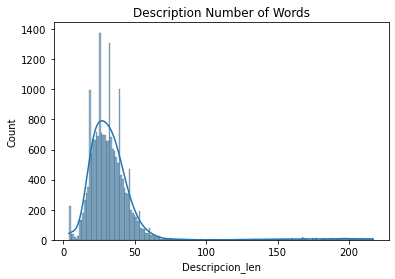

In [22]:
sns.histplot(data_10_90['Descripcion_len'],kde=True)
plt.title('Description Number of Words')
plt.show()

count    3151.000000
mean      619.748017
std       591.373944
min         6.000000
25%       253.000000
50%       422.000000
75%       768.500000
max      5754.000000
Name: Descripcion_len, dtype: float64


Text(0.5, 1.0, 'Description Number of Words - Diario AR')

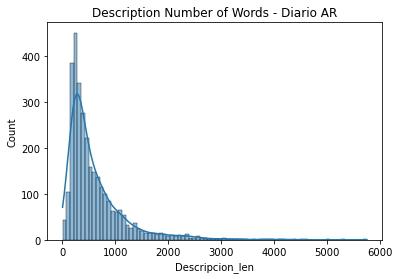

In [23]:
print(data[(data.Diario=='Diario AR')].Descripcion_len.describe())
sns.histplot(data[(data.Diario=='Diario AR')]['Descripcion_len'], kde=True)
plt.title('Description Number of Words - Diario AR')

Diario AR has very long descriptions.

count    3156.000000
mean       15.028517
std        19.076636
min         0.000000
25%         0.000000
50%         0.000000
75%        30.000000
max       104.000000
Name: Descripcion_len, dtype: float64


Text(0.5, 1.0, 'Description Number of Words - Página 12')

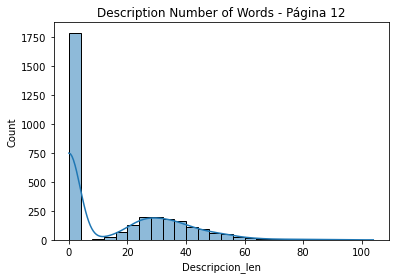

In [24]:
print(data[(data.Diario=='Página 12')].Descripcion_len.describe())
sns.histplot(data[(data.Diario=='Página 12')]['Descripcion_len'], kde=True)
plt.title('Description Number of Words - Página 12')


Página 12 has a lot of news articles without description.

Let's see the description number of words without the data from Diario AR and Página 12, restricted to the selected range.

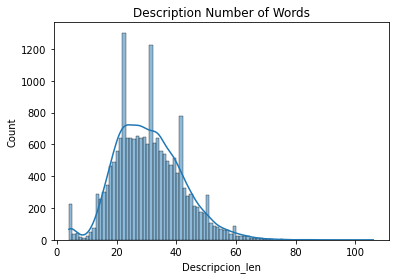

In [25]:
sns.histplot(data_10_90[(data_10_90.Diario!='Diario AR') & (data_10_90.Diario!='Página 12')]['Descripcion_len'],kde=True)
plt.title('Description Number of Words')
plt.show()


Now, in the same set, let's plot the lengths of the columns Texto, Texto clean, and Texto_clean_lemmatized_and_stopwords.

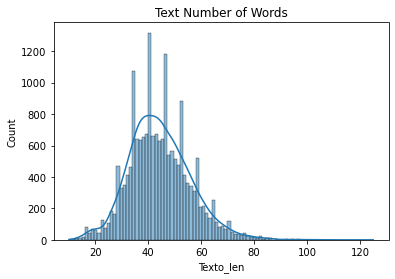

In [26]:
sns.histplot(data_10_90[(data_10_90.Diario!='Diario AR') & (data_10_90.Diario!='Página 12')]['Texto_len'],kde=True)
plt.title('Text Number of Words')
plt.show()

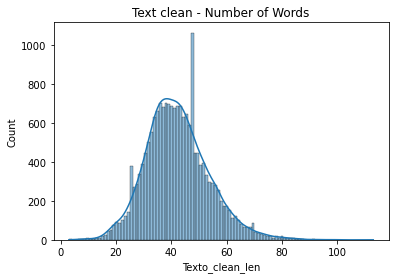

In [27]:
sns.histplot(data_10_90[(data_10_90.Diario!='Diario AR') & (data_10_90.Diario!='Página 12')]['Texto_clean_len'],kde=True)
plt.title('Text clean - Number of Words')
plt.show()

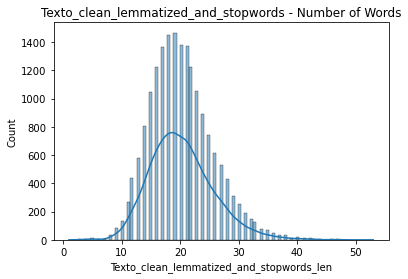

In [28]:
sns.histplot(data_10_90[(data_10_90.Diario!='Diario AR') & (data_10_90.Diario!='Página 12')]['Texto_clean_lemmatized_and_stopwords_len'],kde=True)
plt.title('Texto_clean_lemmatized_and_stopwords - Number of Words')
plt.show()

We can see that the number of words is considerably reduced.

Now, we plot boxplots to observe the differences in length between categories, in each newspaper.

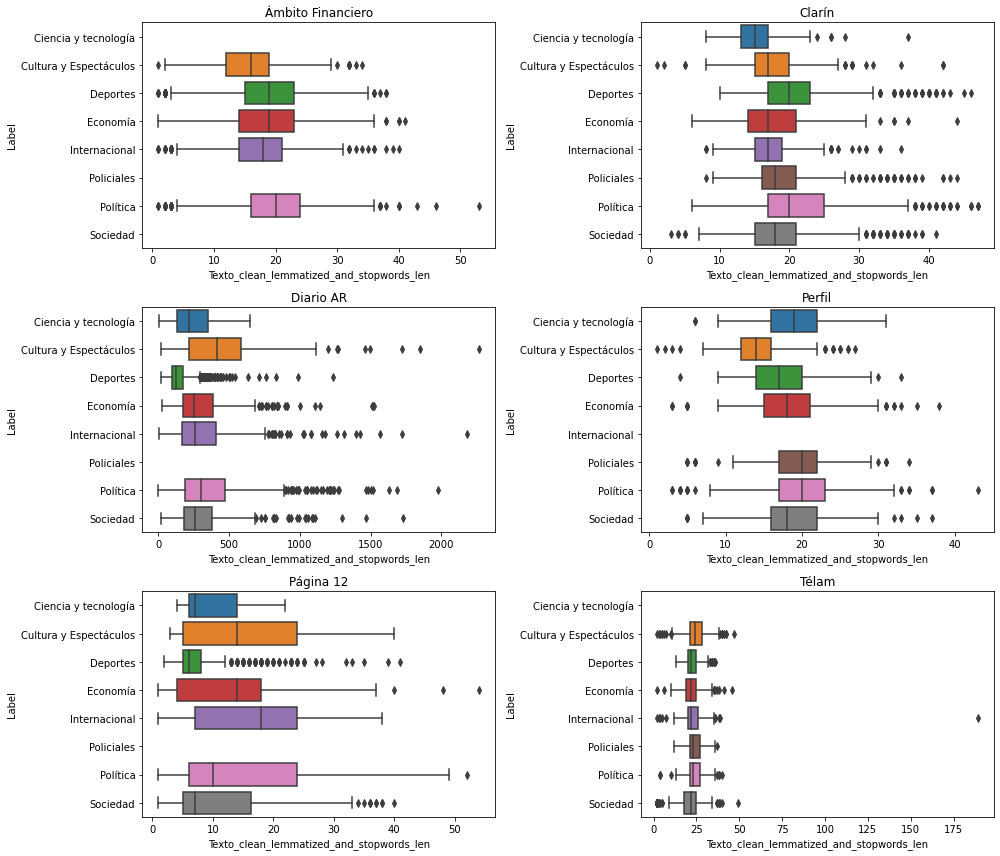

In [29]:
fig, axs = plt.subplots(nrows=3,ncols=2, figsize=(14,12))
for i in range(len(list_of_newspapers)):
    sns.boxplot(y='Label', x='Texto_clean_lemmatized_and_stopwords_len', data=data[data.Diario==list_of_newspapers[i]],order=data.sort_values('Label').Label.unique(),ax=axs[i//2,i%2]).set_title(list_of_newspapers[i])
fig.tight_layout()

#sns.boxplot(data=df, x='Category', y='News_length', width=.5)

In general, there are differences between the newspapers, but not so much between categories in the same newspaper.

### Most common words

We explore the most common words after the cleaning, the removal of stopwords, and lemmatization.

<AxesSubplot:>

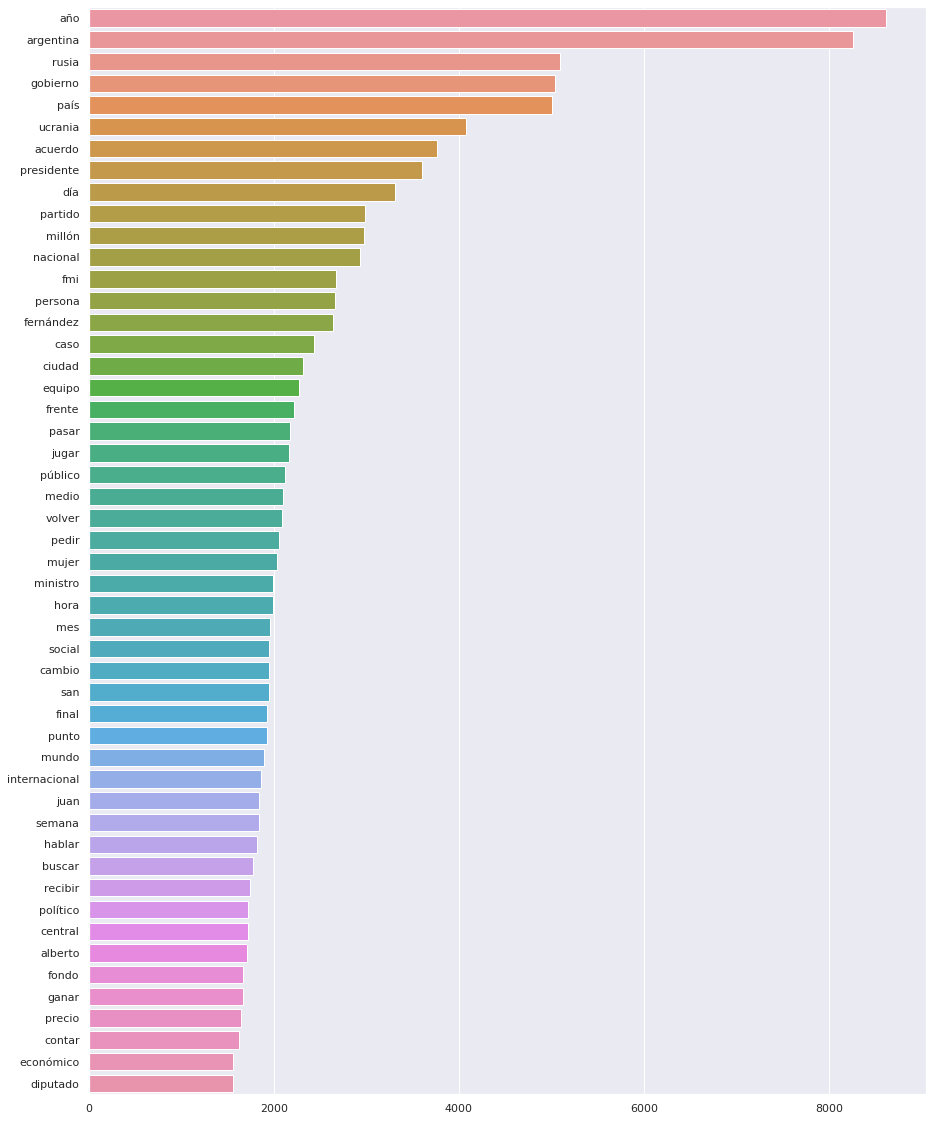

In [30]:
common_words_and_frequency=Counter(" ".join(data['Texto_clean_lemmatized_and_stopwords']).split()).most_common(50)
common_words=[i[0] for i in common_words_and_frequency]
frequency=[i[1] for i in common_words_and_frequency]
sns.set(rc = {'figure.figsize':(15,20)})
sns.barplot(y=common_words,x=frequency)

One possible explanation for the popularity of the word "año" (year) is that a lot of news articles are from the end of the year. Also, when a person is introduced in an article, it is common to say how old that person is (in years). "Rusia" and "Ucrania" are also very popular words, due to the current war.

### Most common words by category

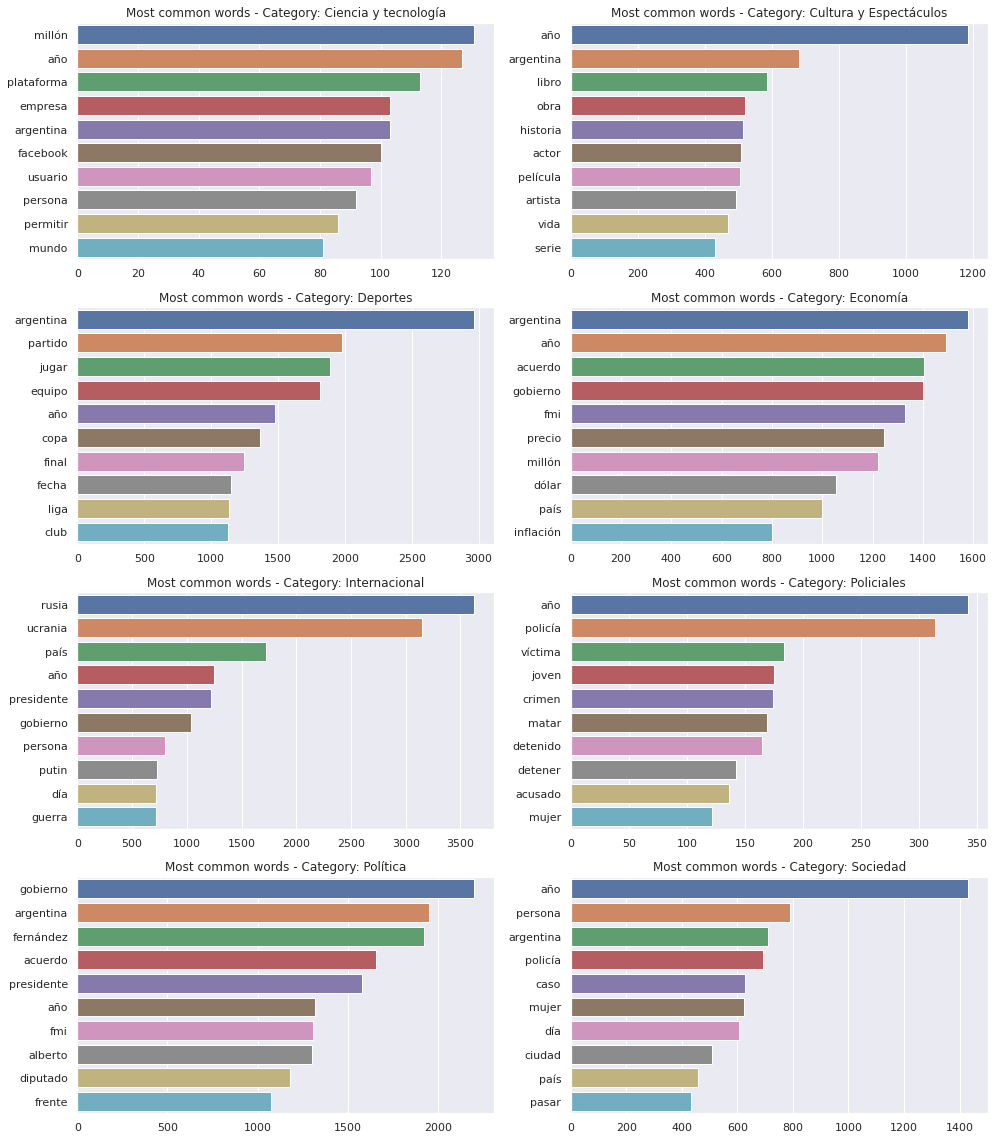

In [31]:
list_of_categories=data.sort_values('Label').Label.unique()
fig, axs = plt.subplots(nrows=4,ncols=2, figsize=(14,16))
for i in range(len(list_of_categories)):
    common_words_and_frequency=Counter(" ".join(data[data.Label==list_of_categories[i]]['Texto_clean_lemmatized_and_stopwords']).split()).most_common(10)
    common_words=[j[0] for j in common_words_and_frequency]
    frequency=[j[1] for j in common_words_and_frequency]
    sns.barplot(y=common_words,x=frequency,ax=axs[i//2,i%2]).set_title('Most common words - Category: ' +list_of_categories[i])
fig.tight_layout()  

### Most common words by newspaper

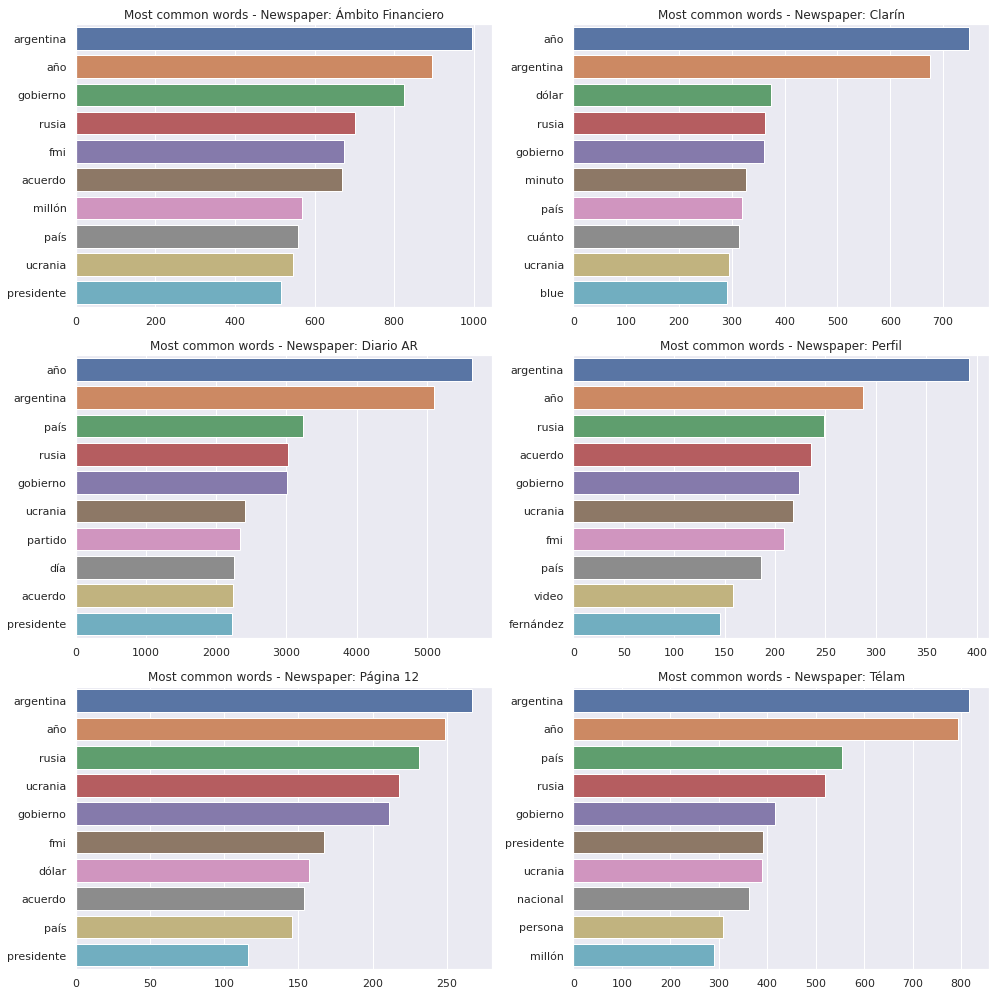

In [32]:
fig, axs = plt.subplots(nrows=3,ncols=2, figsize=(14,14))
for i in range(len(list_of_newspapers)):
    common_words_and_frequency=Counter(" ".join(data[data.Diario==list_of_newspapers[i]]['Texto_clean_lemmatized_and_stopwords']).split()).most_common(10)
    common_words=[j[0] for j in common_words_and_frequency]
    frequency=[j[1] for j in common_words_and_frequency]
    sns.barplot(y=common_words,x=frequency,ax=axs[i//2,i%2]).set_title('Most common words - Newspaper: ' +list_of_newspapers[i])
fig.tight_layout()  

### Word Clouds

First, we look at all the words in the column 'Texto_clean_lemmatized_and_stopwords'.

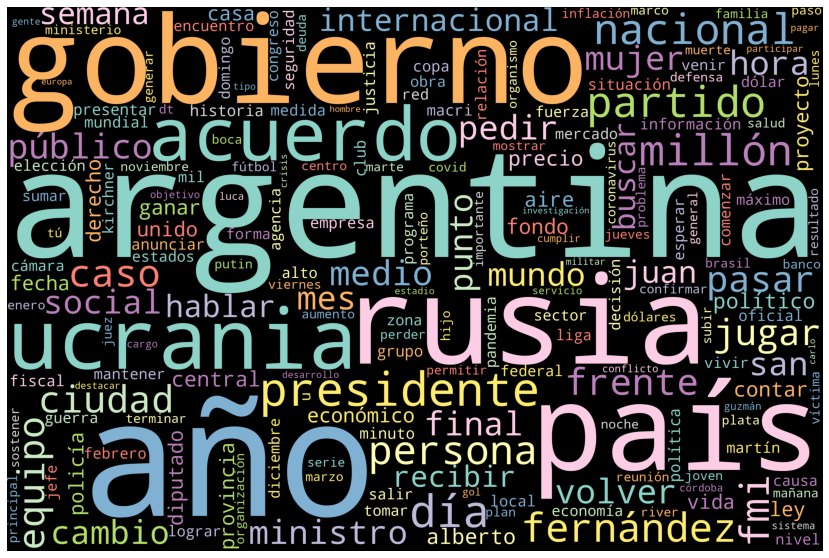

In [33]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(" ".join(data['Texto_clean_lemmatized_and_stopwords']))
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud) 
plt.axis("off");

Now, we make a word cloud for each category.

In [34]:
#We define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(14, 7))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

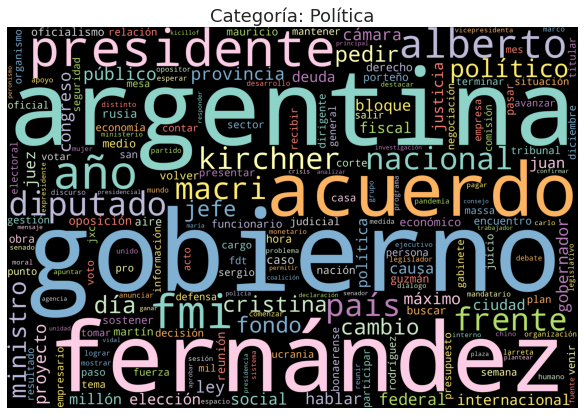

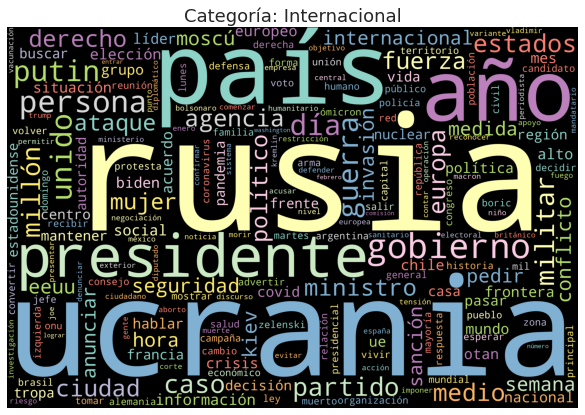

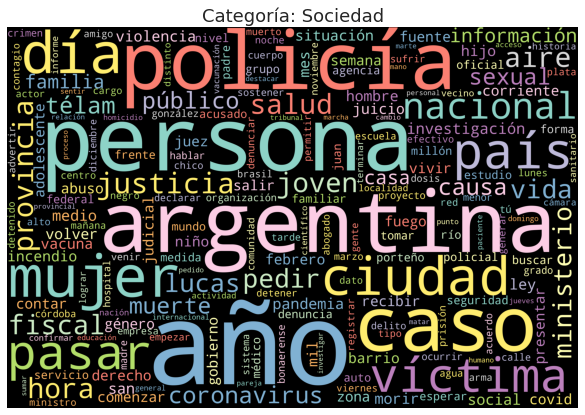

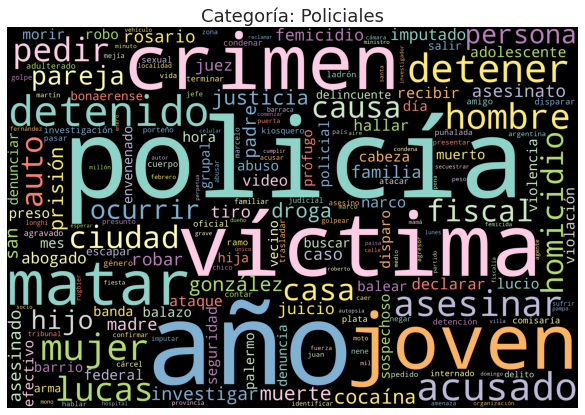

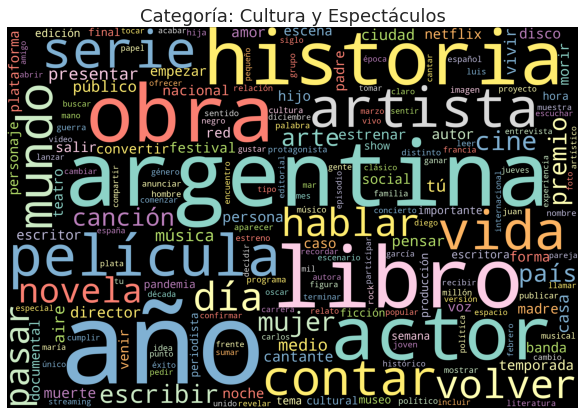

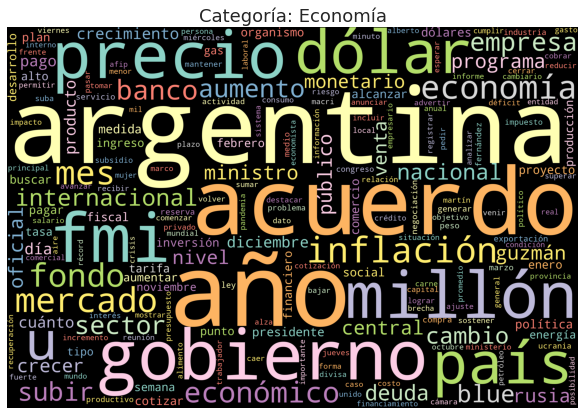

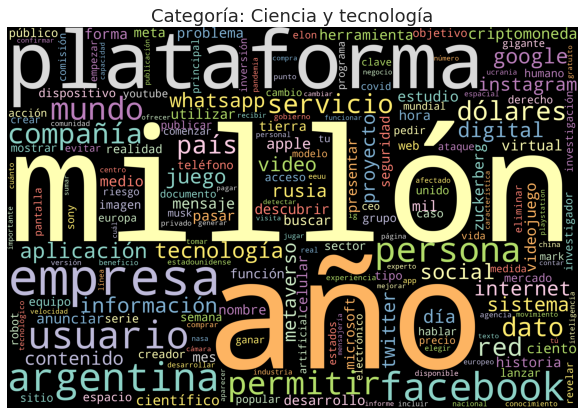

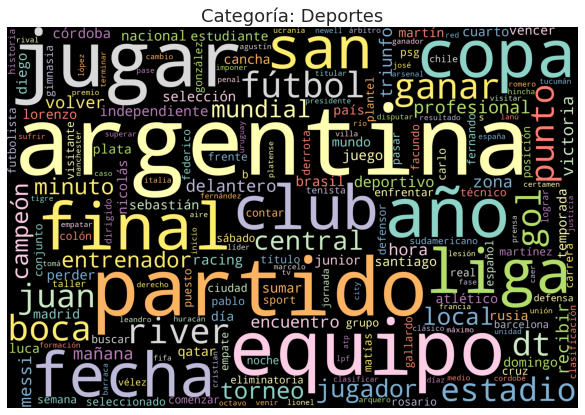

In [35]:
for label in data['Label'].unique(): 
    wordcloud=WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(" ".join(data[data.Label==label]['Texto_clean_lemmatized_and_stopwords']))  
    plot_cloud(wordcloud)
    plt.title("Categoría: " + label, fontdict={'size': 18})

We choose the category Politics to compare word clouds between different newspapers.


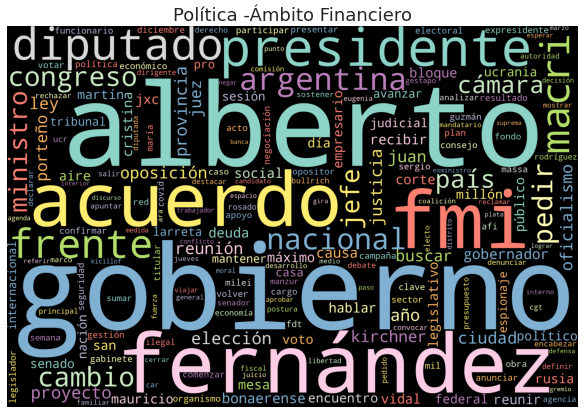

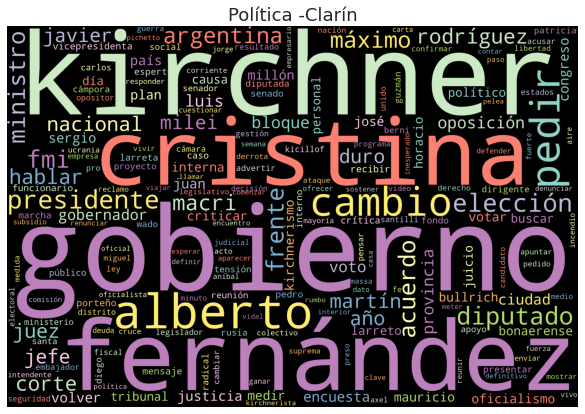

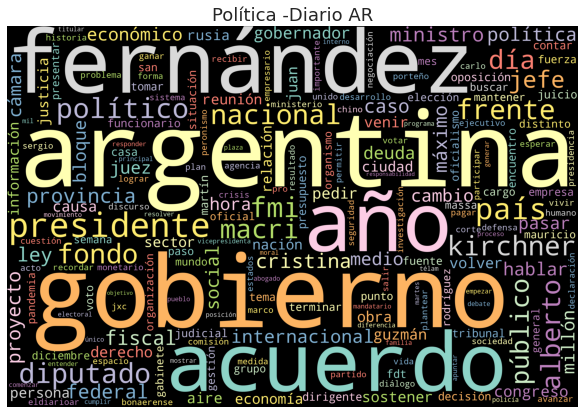

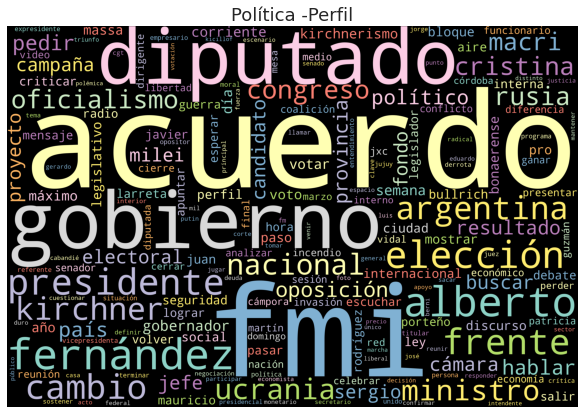

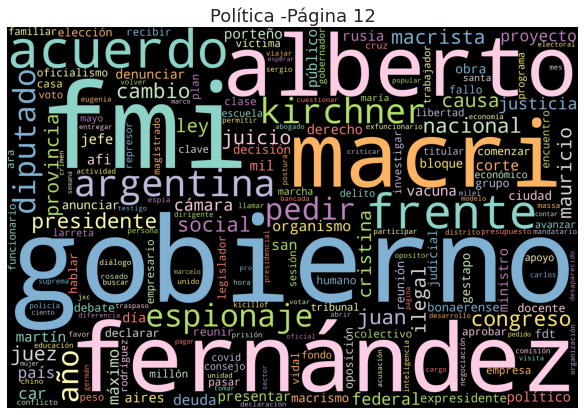

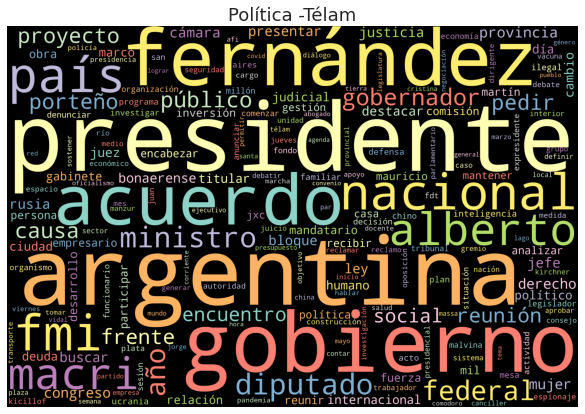

In [36]:
for diario in list_of_newspapers: 
    wordcloud=WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(" ".join(data[(data.Label=='Política') & (data.Diario==diario)]['Texto_clean_lemmatized_and_stopwords']))  
    plot_cloud(wordcloud)
    plt.title("Política -" + diario, fontdict={'size': 18})

In general, in the politics category, all the newspapers have the same most important words:'Gobierno' (government), 'Fernández' (the surname of the current president, and also the surname of the vice president). 
As an observation, Clarín has 'Kirchner' (surname of the former president Néstor Kirchner, who was the spouse of the current vice president and father of Máximo Kirchner, a current member of the congress) and 'Cristina' (the current vice president 'Cristina Fernández de Kirchner') as very important words and Página 12 has 'Macri' as an important word. These words appear with considerably more importance here than in the rest of the newspapers. 

We save the data, now using pickle.

In [37]:
with open('data.pickle', 'wb') as output:
    pickle.dump(data, output)